### Histogram
A [Histogram](https://en.wikipedia.org/wiki/Histogram) represents the distribution of a numerical variable. It counts how many observations fall into each bin (which is a range of values) and displays each bin as a bar. Notice that Histograms look similar to Bar Charts, but they deliver completely different information.

In [ ]:
quantiles (k=4)
quartiles

### Box Plot
Describing a Box Plot:
- The box visualizes the 3 quartiles: $Q_1$, $Q_2$, $Q_3$ as well as the midrange which includes 50% of the data.
- The lower bound is the smaller of either $Q_1-1.5\cdot\mbox{IQR}$ or the minimum.
- The upper bound is the greater of either $Q_3+1.5\cdot\mbox{IQR}$ or the maximum.

Here is some useful information that can be read through Box Plots:
- Looking for potential outliers: An outlier is a data point that is located outside the whiskers.
- Signs of skewness: You can easily conclude that the data is left-skewed, right-skewed or symmetric by comparing $Q_2-Q_1$ and $Q_3-Q_2$.
- Examining how spread the data is: The longer the midrange and the length of whiskers, the wider the distribution is.
- Comparing categories: If the median of a category lies outside of the box of another one, then there is likely to be a difference between the two categories.

### Time series notation
It's important to introduce time series notations:
- $\mathbf{y}=(y_1,y_2,\dots,y_t,\dots,y_T)$ represents the entire series
- $y_t$ (for $t=1,2,\dots,T$) represents an observation, $t$ represents any observed time step
- $\hat{y}_{T+h}$ (for $h=1,2,\dots,\infty$) is an unknown future value which is going to be forecasted, $h$ is the forecasting horizon
- $\hat{y}_{T+h|T}$ is the forecast value $\hat{y}_{T+h}$ taking into account all observations up to time $T$

### Backshift notation
Now we have walked through all important time series transformations: shifting, differencing and summing, let's introduce the *backshift* notation $B$, an operator that shifts our series 1 step backward. We define $B(\mathbf{y})=(\emptyset,y_1,y_2,\dots,y_{t-1},\dots,y_{T-1})$. We are going to use $B$ to describe different transformations of a simple series $\mathbf{y}=(10,12,15,16,20)$.

*Shifting*
- By definition, $B(\mathbf{y})=(\emptyset,10,12,15,16)$
- $B^2(\mathbf{y})=B(B(\mathbf{y}))=(\emptyset,\emptyset,10,12,15)$ represents the 2-step lagged series
- $B^k(\mathbf{y})$ represents a $k$-step lagged series

*Differencing*
- $(1-B)(\mathbf{y})=\mathbf{y}-B(\mathbf{y})=(\emptyset,2,3,1,4)$ represents the 1-order differenced series
- $(1-B)^2(\mathbf{y})=(\mathbf{y}-B(\mathbf{y}))-B(\mathbf{y}-B(\mathbf{y}))=(\emptyset,\emptyset,1,-2,3)$ represents the 2-order differenced series
- $(1-B)^k(\mathbf{y})$ represents a $k$-order differenced series

*Running total*
- Denotes $\mathbf{z}=(10,22,37,53,73)$ the cumulative sum of $\mathbf{y}$, then $(1-B)(\mathbf{z})=(\emptyset,12,15,16,20)=\mathbf{y}$
- Rewriting the above equation gives us $(1-B)^{-1}(\mathbf{y})$ the representation of cumulative sum, can also be thought as the inverse of differencing

### Auto correlation
When identifying possible relationship between historical data and the current moment, there are two useful functions, each is plotted in a lollipop chart:
- ACF (Auto-Correlation Function). It plots the Pearson's correlation coefficients $\rho_1,\rho_2,\dots$ of a series $\mathbf{y}$ against each of its lagged versions. That is to say, $\rho_1$ measures how $B(\mathbf{y})$ affects $\mathbf{y}$. For $\rho_2$, it actually measures the total effect of both $B^2(\mathbf{y})$ and $B(\mathbf{y})$ on $\mathbf{y}$, since $B^2(\mathbf{y})$ and $B(\mathbf{y})$ are also correlated. This explains why the ACF chart is usually smooth.
- PACF (Partial ACF). It plots the coefficients $\beta_1,\beta_2,\dots$ of the OLS regression function
$\mathbf{y}=\beta_0+\beta_1B(\mathbf{y})+\beta_2B^2(\mathbf{y})+\dots$
PACF describes the direct effect $\beta_k$ made by previous data $B^k(\mathbf{y})$, since the later effects has been captured by the corresponding coefficients $(\beta_1,\beta_2,\dots,\beta_{k-1})$. This overcomes the cumulative effect in ACF.

Both ACF and PACF include a $95\%$ confidence band indicating the correlation coefficient is not significant if it falls into that band.

### Seasonal decomposition
Time series decompostion is a statistical technique that factorizes data into three components: trend, residual and noise. There are two approaches to achieve this, using an additive model or a multiplicative model, where the original data equals to the sum or the product of its componennts.

### Stationarity
Stationarity refers to a time series whose characteristics do not depends on which time period it is observed. If a time series violates one of these conditions, it is considered non-stationary:
- Constant mean at every timeframe
- Constant variance at every timeframe
- No seasonality

Instead of looking at charts, [Agumented Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) test can be used to decide if a series is stationary. The hypotheses:
- $H_0$: data is non-stationary
- $H_1$: data is stationary

### ARIMA functions
In a nutshell, ARIMA is a combination of 3 separated processes:

- Integration, $\text{I}(d)$. In this process, the model keeps differencing a time series until it's stationary. The parameter $d$ is the order of differencing and is determined using ADF test. The term *integration* shares the same meaning as summing, which implies the reverse of differencing.

- Auto-Regressive, $\text{AR}(p)$. In this process, we perform a linear regression model where input variables are lagged versions of our data. The parameter $p$ indicates the maximum lag degree and is determined using PACF of a stationary series: when a coefficient suddenly drops to 0, then the corresponding lag is a possible value for $p$. The $\text{AR}(p)$ function is:

$$\begin{align}
\hat{y}_t
&= c+\phi_1y_{t-1}+\phi_2y_{t-2}+\dots+\phi_py_{t-p} \\
&= c+(\phi_1B+\phi_2B^2+\dots+\phi_pB^p)y_t \\
\end{align}$$

- Moving Average model, $\text{MA}(q)$. It models our time series as a linear combination of past error (denoted $\epsilon$, where $\epsilon_{t-k}=y_{t-k}-\phi_1 y_{t-k-1}$). The parameter $q$ indicates the maximum lag degree and is determined using ACF chart of a stationary series, in a similar decision-making process as for $p$. The $\text{MA}(q)$ functions is:

$$\begin{align}
\hat{y}_t
&= c+\theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}+\dots+\theta_q\epsilon_{t-q} \\
&= c+(\theta_1B+\theta_2B^2+\dots+\theta_qB^q)\epsilon_t \\
\end{align}$$

The entire model $\text{ARIMA}(p,d,q)$ is written as below:

$$(1-B)^d\hat{y}_t=c+(\phi_1B+\phi_2B^2+\dots+\phi_pB^p)(1-B)^dy_t+(\theta_1B+\theta_2B^2+\dots+\theta_qB^q)\epsilon_t$$

### ARIMA Procedure
- *Estimation*. ARIMA estimates its parameters $c,\phi_1,\phi_2,\dots,\phi_p,\theta_1,\theta_2,\dots,\theta_q$ either by minimizing sum of squared errors ([OLS](https://en.wikipedia.org/wiki/Ordinary_least_squares)) or by maximizing likelihood ([MLE](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)). Both methods return the same result.

- *Point forecasting*. It's obvious, by looking at ARIMA function, that each observation at time $t$ is modeled using previous step $t-1,t-2,\dots$. This prediction is written $\hat{y}_{t|t-1}$. As we have known all values up to time $T$, the forecasting is done in a *recursive* behaviour: $\hat{y}_{T+1|T},\hat{y}_{T+2|T+1},\dots,\hat{y}_{T+h|T+h-1}$.

- *Prediction interval*. Being a regression model, ARIMA assumes that fitted residuals are normally distributed. Thus the confidence interval is given by $z_{\alpha/2}\sigma_h$ where $\alpha$ is significance level and $\sigma_h$ is the forecast standard deviation, it is proportional to the variance of residuals and $h$. But also note that when the above assumption is not hold, then prediction interval may be incorrect.

### Model selection
Model selection (also known as hyperparameters tuning) for ARIMA is the process of choosing appropriate values for $p$, $q$ and $d$. While the selection of $d$ is very straightforward, we would want to put more focus on tuning $p$ and $q$. As described earlier, viable values for $p$ and $q$ can be obtained by looking at PACF and ACF charts of the differenced series, respectively. However, this method usually returns a number of choices rather than guarantees a single optimal selection. Thus we treat it as a tool for limiting potential candidates, then perform greedy search. The objective of exhausted search in ARIMA is to minimize an *information criterion*, which has several options:
- [Akaike's Information Criterion](https://en.wikipedia.org/wiki/Akaike_information_criterion):
$\text{AIC} = -2 \log(L) + 2(p+q+k+1)$
- [Bayesian Information Criterion](https://en.wikipedia.org/wiki/Bayesian_information_criterion):
$\text{BIC} = \text{AIC} + [\log(T)-2](p+q+k+1)$
- AICc, a corrected version of AIC for small data, in which time series is usually the case. When $n\rightarrow\infty$, AICc converges to AIC.

All the above information criteria are constructed of the *loss* part and the *regularization* part. The regularization part prevents the model from adding too many explanatory variables and makes sure the model has a good forecasting power. It is recommended to use AICc in real-world tasks.

### VAR
There are $K$ time series $y_1,y_2,\dots,y_k$. Let's say $y_1$ is the target/dependence variable, the VAR model is:

$$y_{1,t}=c+\sum_{i=1}^{p}\phi_{1,i}y_{1,t-i}+\sum_{i=1}^{p}\phi_{2,i}y_{2,t-i}+\dots+\sum_{i=1}^{p}\phi_{k,i}y_{k,t-i}$$

where
- $y_{2,t-i}$ is the time series number 2, observed at lag i.
- $\phi$ is a coefficient -> the model will estimate
- $c$ is a constant

In other words, VAR(p) is a linear regression model with $k\times p$ independent variables: $k$ time series x $p$ lagged versions. The target variable in this case is bikeshare (rentalcount or sumduration). Output of VAR is $k\times p$ parameters $\phi$ attached to the corresponding independent varibale.

In [2]:
library(tidyverse)
library(dplyr)
library(moments)
library(tsibble)
library(lubridate)
library(ggplot2)
library(bikedata)
library(forecast)
library(urca)
library(digest)
library(tseries)

In [ ]:
dl_bikedata(city='London', data_dir='london_bikeshare', date=20191001:20201231)

In [133]:
list.files('london_bikeshare')

[1] "181JourneyDataExtract25Sep2019-01Oct2019.csv"
 [2] "182JourneyDataExtract02Oct2019-08Oct2019.csv"
 [3] "183JourneyDataExtract09Oct2019-15Oct2019.csv"
 [4] "184JourneyDataExtract16Oct2019-22Oct2019.csv"
 [5] "185JourneyDataExtract23Oct2019-29Oct2019.csv"
 [6] "186JourneyDataExtract30Oct2019-05Nov2019.csv"
 [7] "187JourneyDataExtract06Nov2019-12Nov2019.csv"
 [8] "188JourneyDataExtract13Nov2019-19Nov2019.csv"
 [9] "189JourneyDataExtract20Nov2019-26Nov2019.csv"
[10] "190JourneyDataExtract27Nov2019-03Dec2019.csv"
[11] "191JourneyDataExtract04Dec2019-10Dec2019.csv"
[12] "192JourneyDataExtract11Dec2019-17Dec2019.csv"
[13] "193JourneyDataExtract18Dec2019-24Dec2019.csv"
[14] "194JourneyDataExtract25Dec2019-31Dec2019.csv"
[15] "195JourneyDataExtract01Jan2020-07Jan2020.csv"
[16] "196JourneyDataExtract08Jan2020-14Jan2020.csv"
[17] "197JourneyDataExtract15Jan2020-21Jan2020.csv"
[18] "198JourneyDataExtract22Jan2020-28Jan2020.csv"
[19] "199JourneyDataExtract29Jan2020-04Feb2020.csv"
[20] "200JourneyDataExtract05Feb2020-11Feb2020.csv"
[21] "201JourneyDataExtract12Feb2020-18Feb2020.csv"
[22] "202JourneyDataExtract19Feb2020-25Feb2020.csv"
[23] "203JourneyDataExtract26Feb2020-03Mar2020.csv"
[24] "204JourneyDataExtract04Mar2020-10Mar2020.csv"
[25] "205JourneyDataExtract11Mar2020-17Mar2020.csv"
[26] "206JourneyDataExtract18Mar2020-24Mar2020.csv"
[27] "207JourneyDataExtract25Mar2020-31Mar2020.csv"
[28] "208JourneyDataExtract01Apr2020-07Apr2020.csv"
[29] "209JourneyDataExtract08Apr2020-14Apr2020.csv"
[30] "210JourneyDataExtract15Apr2020-21Apr2020.csv"
[31] "211JourneyDataExtract22Apr2020-28Apr2020.csv"
[32] "212JourneyDataExtract29Apr2020-05May2020.csv"
[33] "213JourneyDataExtract06May2020-12May2020.csv"
[34] "214JourneyDataExtract13May2020-19May2020.csv"
[35] "215JourneyDataExtract20May2020-26May2020.csv"
[36] "216JourneyDataExtract27May2020-02Jun2020.csv"
[37] "217JourneyDataExtract03Jun2020-09Jun2020.csv"
[38] "218JourneyDataExtract10Jun2020-16Jun2020.csv"
[39] "219JourneyDataExtract17Jun2020-23Jun2020.csv"
[40] "220JourneyDataExtract24Jun2020-30Jun2020.csv"
[41] "221JourneyDataExtract01Jul2020-07Jul2020.csv"
[42] "222JourneyDataExtract08Jul2020-14Jul2020.csv"
[43] "223JourneyDataExtract15Jul2020-21Jul2020.csv"
[44] "224JourneyDataExtract22Jul2020-28Jul2020.csv"
[45] "225JourneyDataExtract29Jul2020-04Aug2020.csv"
[46] "226JourneyDataExtract05Aug2020-11Aug2020.csv"
[47] "227JourneyDataExtract12Aug2020-18Aug2020.csv"
[48] "228JourneyDataExtract19Aug2020-25Aug2020.csv"
[49] "229JourneyDataExtract26Aug2020-01Sep2020.csv"
[50] "230JourneyDataExtract02Sep2020-08Sep2020.csv"
[51] "231JourneyDataExtract09Sep2020-15Sep2020.csv"
[52] "232JourneyDataExtract16Sep2020-22Sep2020.csv"
[53] "233JourneyDataExtract23Sep2020-29Sep2020.csv"
[54] "234JourneyDataExtract30Sep2020-06Oct2020.csv"
[55] "235JourneyDataExtract07Oct2020-13Oct2020.csv"
[56] "236JourneyDataExtract14Oct2020-20Oct2020.csv"
[57] "237JourneyDataExtract21Oct2020-27Oct2020.csv"
[58] "238JourneyDataExtract28Oct2020-03Nov2020.csv"
[59] "239JourneyDataExtract04Nov2020-10Nov2020.csv"
[60] "240JourneyDataExtract11Nov2020-17Nov2020.csv"
[61] "241JourneyDataExtract18Nov2020-24Nov2020.csv"
[62] "242JourneyDataExtract25Nov2020-01Dec2020.csv"
[63] "243JourneyDataExtract02Dec2020-08Dec2020.csv"
[64] "244JourneyDataExtract09Dec2020-15Dec2020.csv"
[65] "245JourneyDataExtract16Dec2020-22Dec2020.csv"
[66] "246JourneyDataExtract23Dec2020-29Dec2020.csv"
[67] "246JourneyDataExtract30Dec2020-05Jan2021.csv"

In [135]:
df <- read.csv('london_bikeshare/181JourneyDataExtract25Sep2019-01Oct2019.csv')
df %>% head

,Rental.Id,Duration,Bike.Id,End.Date,EndStation.Id,EndStation.Name,Start.Date,StartStation.Id,StartStation.Name
,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>
1,91697541,1080,3399,28/09/2019 14:30,553,"Regent's Row , Haggerston",28/09/2019 14:12,71,"Newgate Street , St. Paul's"
2,91699023,180,14888,28/09/2019 14:53,502,"Bonner Gate, Victoria Park",28/09/2019 14:50,446,"York Hall, Bethnal Green"
3,91621541,120,16198,25/09/2019 20:05,502,"Bonner Gate, Victoria Park",25/09/2019 20:03,446,"York Hall, Bethnal Green"
4,91601770,960,11102,25/09/2019 11:31,281,"Smith Square, Westminster",25/09/2019 11:15,839,"Sea Containers, South Bank"
5,91649081,600,8867,26/09/2019 18:56,94,"Bricklayers Arms, Borough",26/09/2019 18:46,193,"Bankside Mix, Bankside"
6,91714885,1260,2309,29/09/2019 12:05,553,"Regent's Row , Haggerston",29/09/2019 11:44,393,"Snow Hill, Farringdon"


In [137]:
df$Start.Date %>% head %>% as.POSIXct(format='%d/%m/%Y %H:%M')

[1] "2019-09-28 14:12:00 +07" "2019-09-28 14:50:00 +07"
[3] "2019-09-25 20:03:00 +07" "2019-09-25 11:15:00 +07"
[5] "2019-09-26 18:46:00 +07" "2019-09-29 11:44:00 +07"

In [138]:
df$Start.Date %>% head %>% as.POSIXct(format='%d/%m/%Y %H:%M') %>% floor_date(unit='hour')

[1] "2019-09-28 14:00:00 +07" "2019-09-28 14:00:00 +07"
[3] "2019-09-25 20:00:00 +07" "2019-09-25 11:00:00 +07"
[5] "2019-09-26 18:00:00 +07" "2019-09-29 11:00:00 +07"

aggregate function: input la 1 vector, output la 1 so
(1,2,3) -> 2


In [134]:
df$start.hour <- df$Start.Date %>%
    as.character %>%
    as.POSIXct(format='%d/%m/%Y %H:%M') %>%
    floor_date(unit='hour')
df <- df %>% group_by(start.hour) %>% summarise(
    count.rental=n()
    , sum.duration=sum(Duration)
    , avg.duration=mean(Duration)
    , std.duration=sd(Duration)
    , skew.duration=skewness(Duration)
)

In [142]:
ls = list()
for (i in c(1,2,3)) {
    i <- i*2
    ls <- append(ls, list(i))
}

In [143]:
ls

[[1]]
[1] 2

[[2]]
[1] 4

[[3]]
[1] 6

In [107]:
# aggregating data
ls = list()
for (path in list.files('london_bikeshare')) {
    path = paste('london_bikeshare', path, sep='/')
    df <- read.csv(path)
    # df$Start.Date <- df$Start.Date %>% as.character %>% as.Date(format='%d/%m/%Y %H:%M')
    df$start.hour <- df$Start.Date %>%
        as.character %>%
        as.POSIXct(format='%d/%m/%Y %H:%M') %>%
        floor_date(unit='hour')
    df <- df %>% group_by(start.hour) %>% summarise(
        count.rental=n()
        , sum.duration=sum(Duration)
        , avg.duration=mean(Duration)
        , std.duration=sd(Duration)
        , skew.duration=skewness(Duration)
    )
    ls <- append(ls, list(df))
}
dfUnion <- ls %>% reduce(union)

write.csv(dfUnion, 'london_bikeshare.csv', row.names=FALSE)

In [13]:
dfLondon = read.csv('processed/london_bikeshare.csv')
dfLondon$start.hour <- dfLondon$start.hour %>% as.POSIXct
dfLondon$start.date <- dfLondon$start.hour %>% round(units='day') %>% as.Date
dfLondon <- dfLondon %>%
    group_by(start.date) %>%
    summarise(
        count.rental = sum(count.rental),
        sum.duration = sum(sum.duration)
    )
dfLondon$start.wday <- dfLondon$start.date %>% wday(label=TRUE, week_start=1)

In [16]:
dfLondon %>%
    mutate(start.month = start.date %>% round_date(unit='month')) %>%
    group_by(start.month) %>%
    summarise(
        count.rental = sum(count.rental),
        sum.duration = sum(sum.duration)) %>%
    mutate(avg.duration = sum.duration / count.rental) %>%
    write.csv('summary_london.csv', row.names=FALSE)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



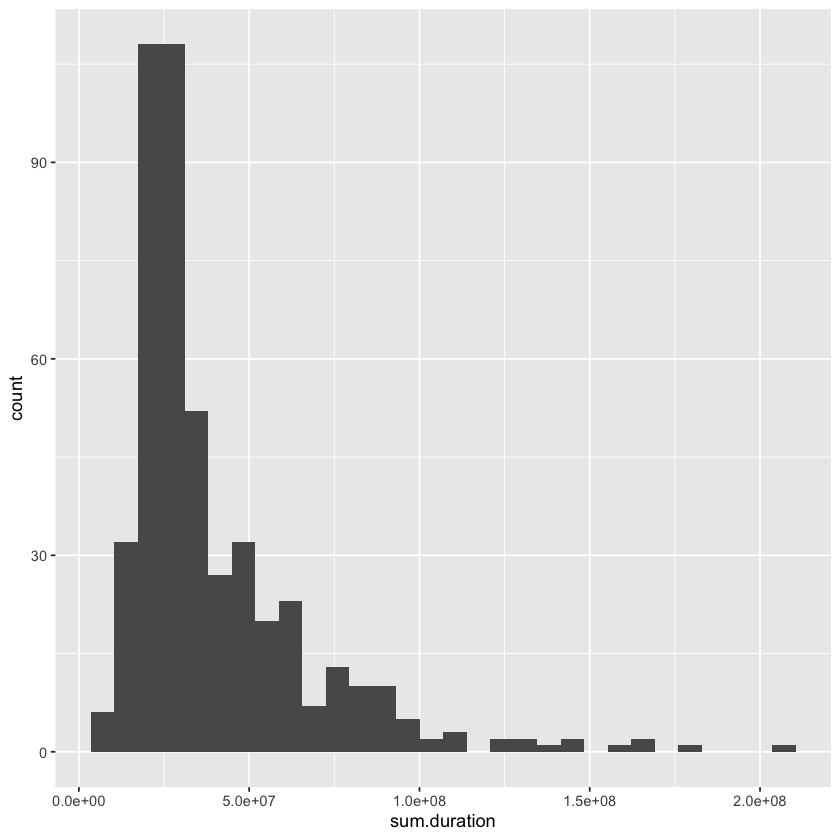

In [109]:
options(repr.plot.width=7, repr.plot.height=7)
ggplot(dfLondon) +
    aes(x=sum.duration) +
    geom_histogram()

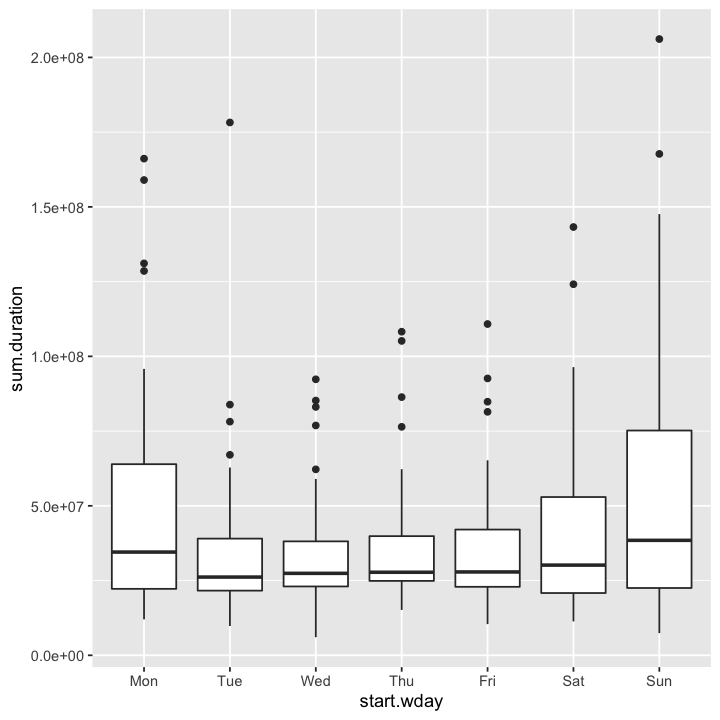

In [110]:
options(repr.plot.width=6, repr.plot.height=6)
ggplot(dfLondon) +
    aes(x=start.wday, y=sum.duration) +
    geom_boxplot()

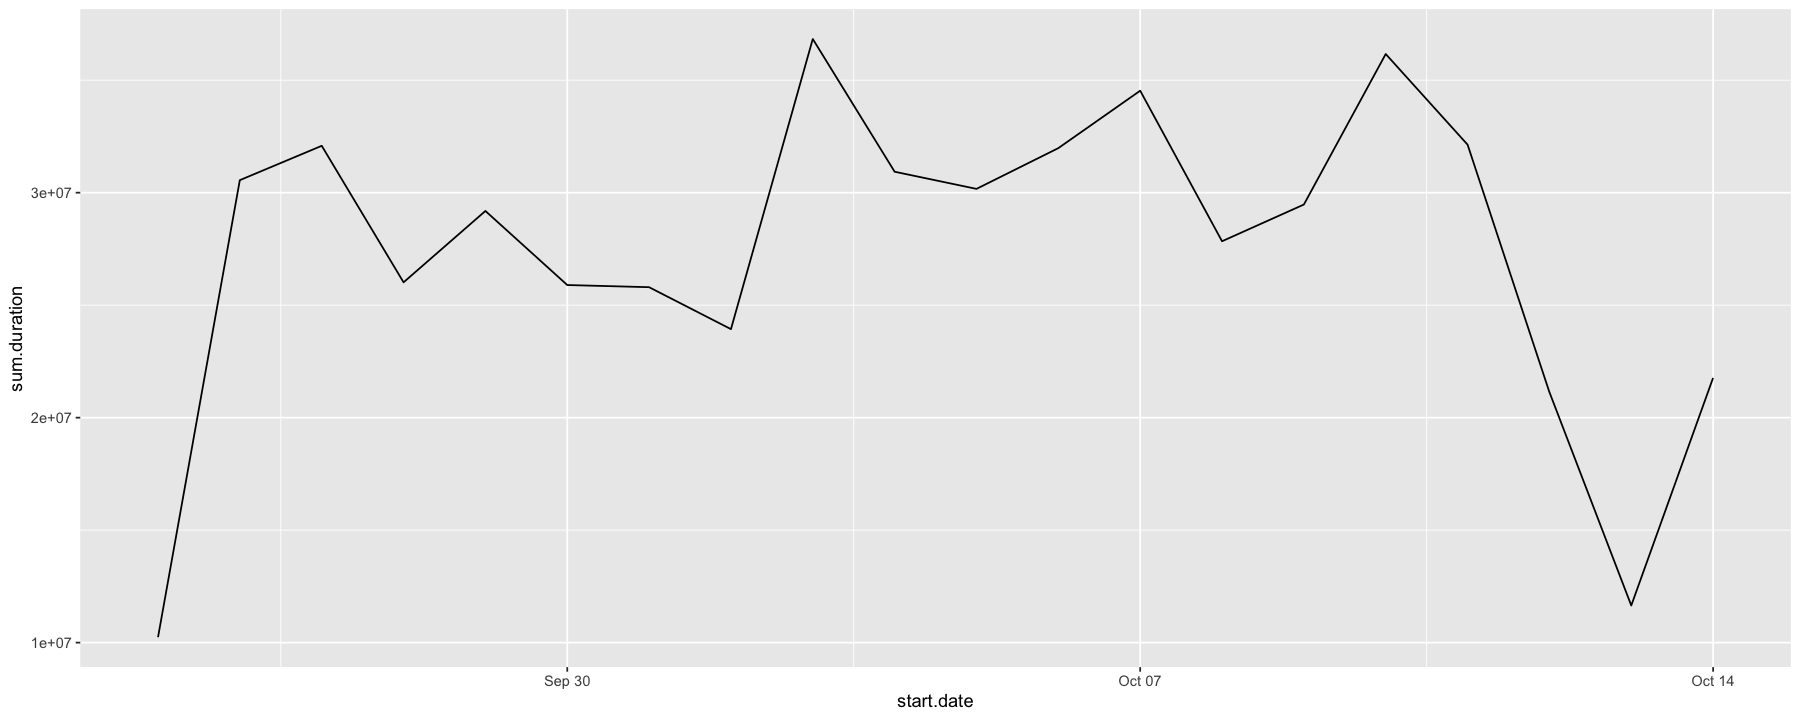

In [132]:
dfLondon %>%
    head(20) %>%
    ggplot +
        aes(x=start.date, y=sum.duration) +
        geom_line()

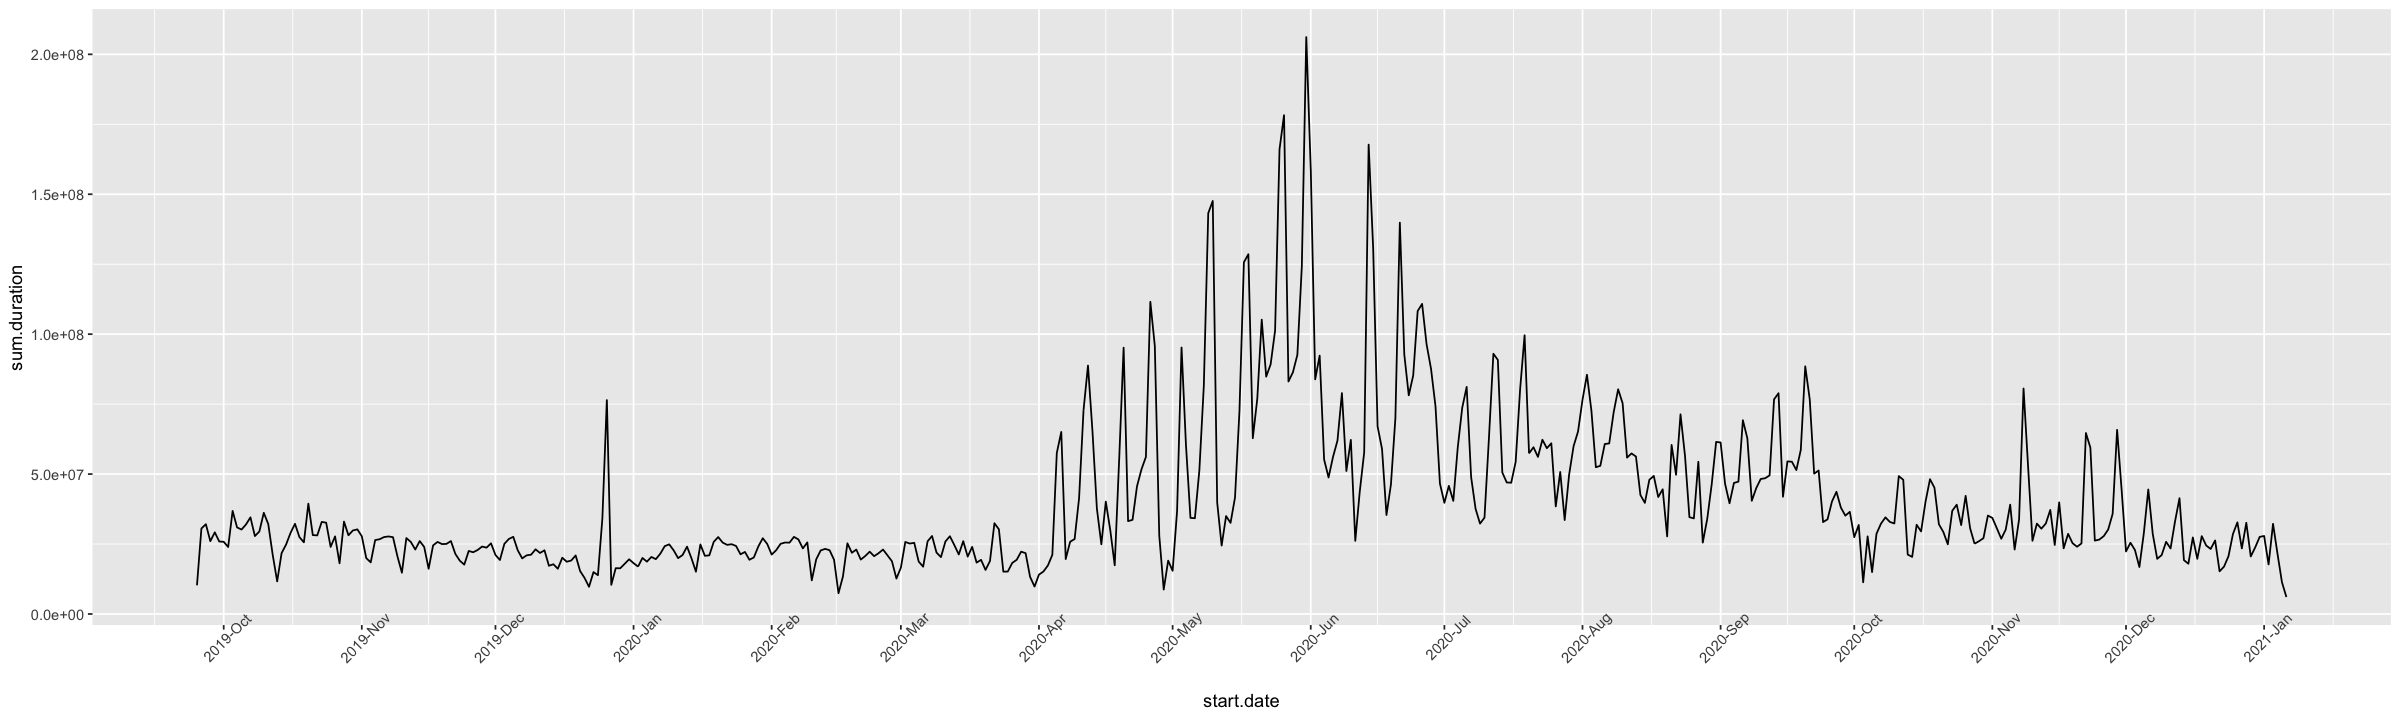

In [111]:
options(repr.plot.width=20, repr.plot.height=6)
ggplot(dfLondon) +
    aes(x=start.date, y=sum.duration, group=1) +
    geom_line(stat='identity') +
    scale_x_date(date_labels = "%Y-%b", date_breaks="1 month") +
    theme(axis.text.x=element_text(angle=45))

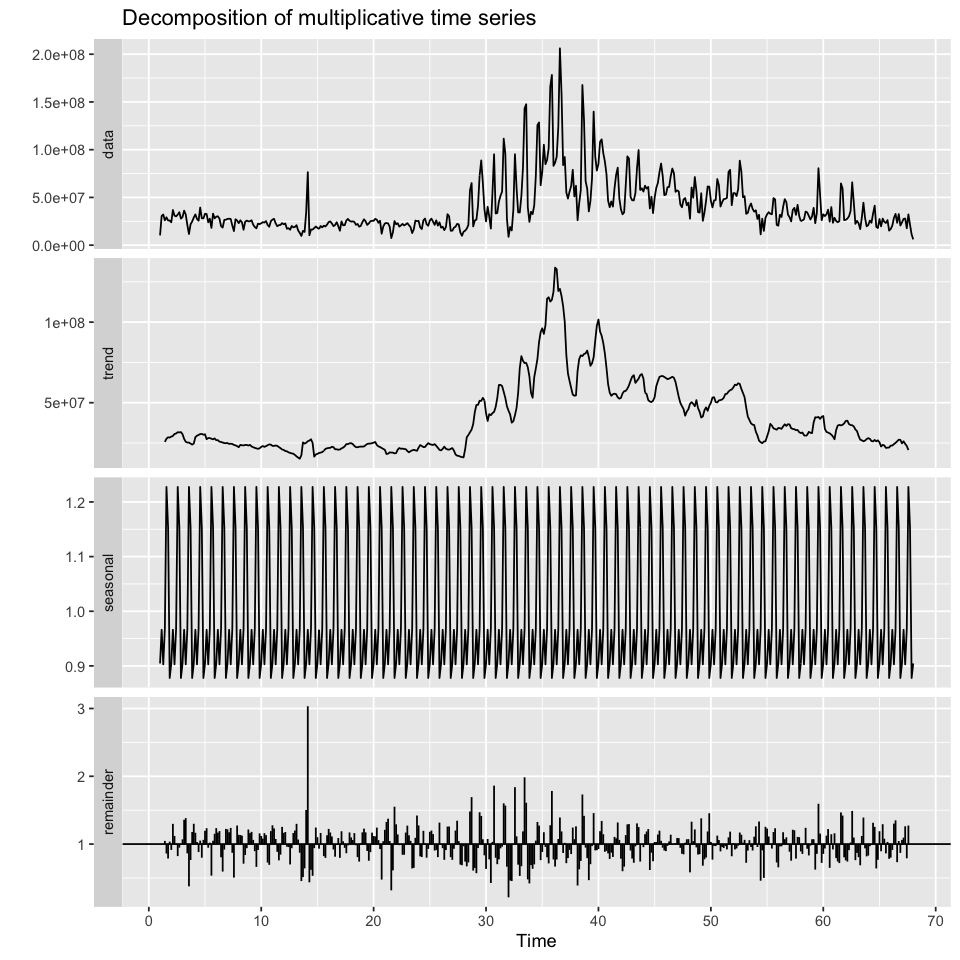

In [113]:
options(repr.plot.width=8, repr.plot.height=8)
dfLondon$sum.duration %>%
    ts(frequency=7) %>%
    decompose(type='multiplicative') %>%
    autoplot

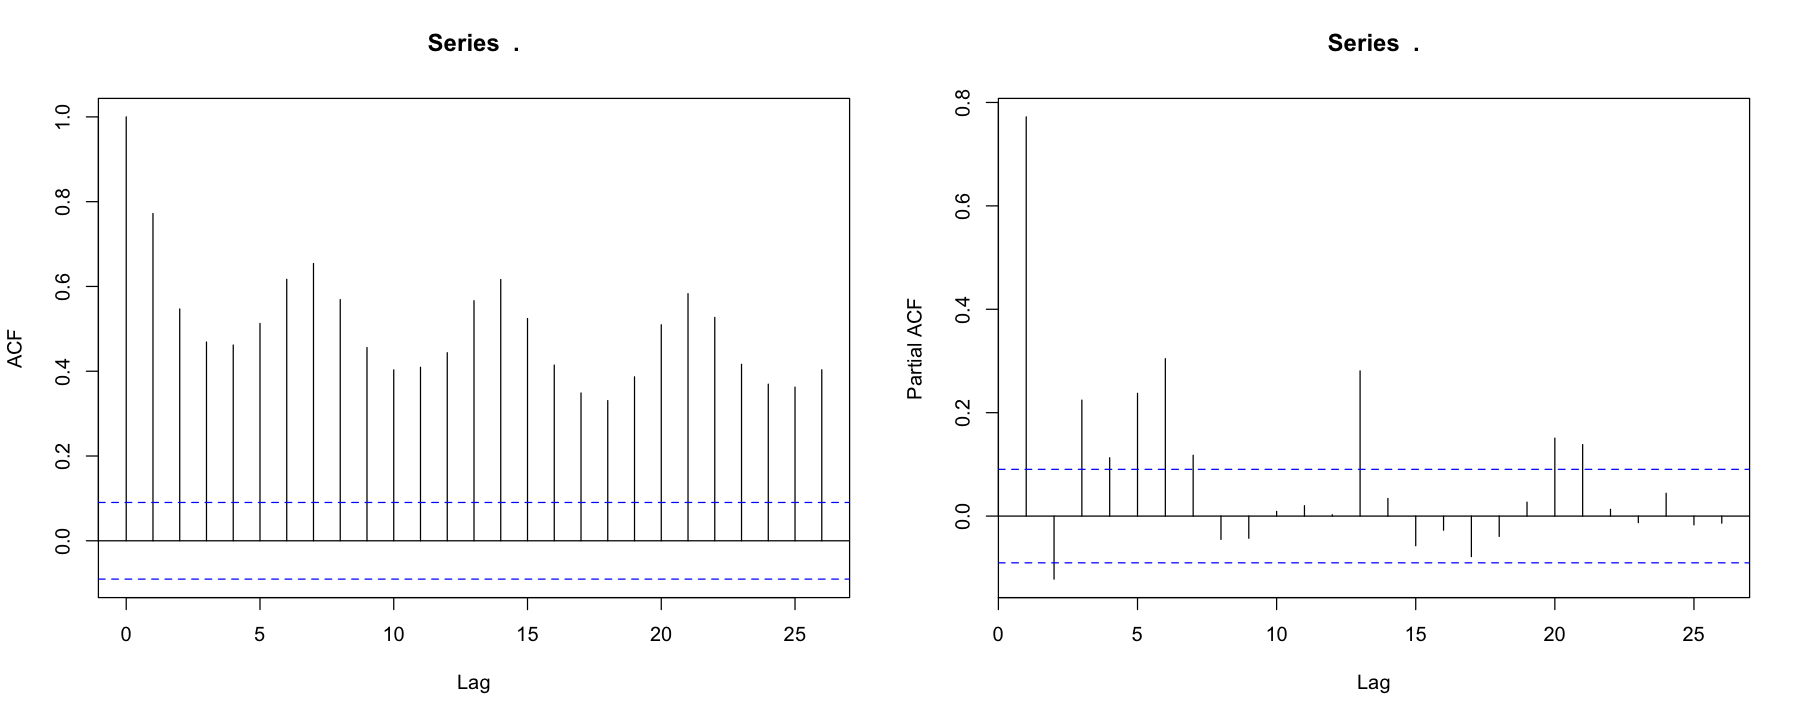

In [114]:
options(repr.plot.width=15, repr.plot.height=6)
par(mfrow=c(1,2))
dfLondon$sum.duration %>% acf
dfLondon$sum.duration %>% pacf

In [115]:
dfLondon$sum.duration %>% adf.test(k=0)

Warning message in adf.test(., k = 0):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  .
Dickey-Fuller = -7.8463, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


In [116]:
dfLondon$sum.duration %>% adf.test(k=1)

Warning message in adf.test(., k = 1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  .
Dickey-Fuller = -8.3859, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


In [117]:
dfLondon$sum.duration %>% adf.test(k=7)


	Augmented Dickey-Fuller Test

data:  .
Dickey-Fuller = -2.4598, Lag order = 7, p-value = 0.3835
alternative hypothesis: stationary


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



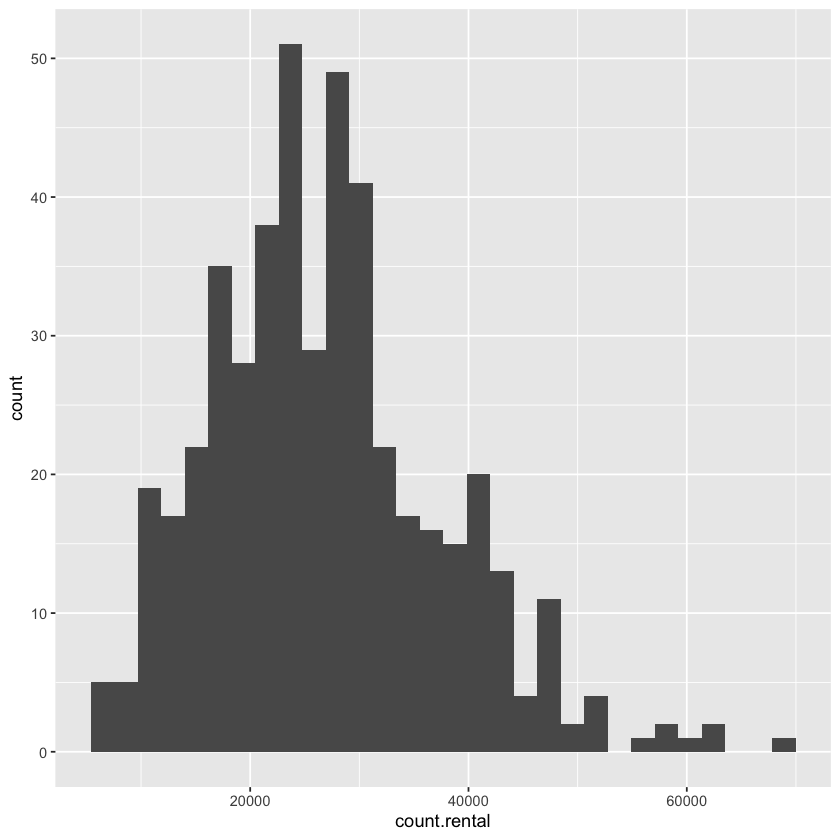

In [118]:
options(repr.plot.width=7, repr.plot.height=7)
ggplot(dfLondon) +
    aes(x=count.rental) +
    geom_histogram()

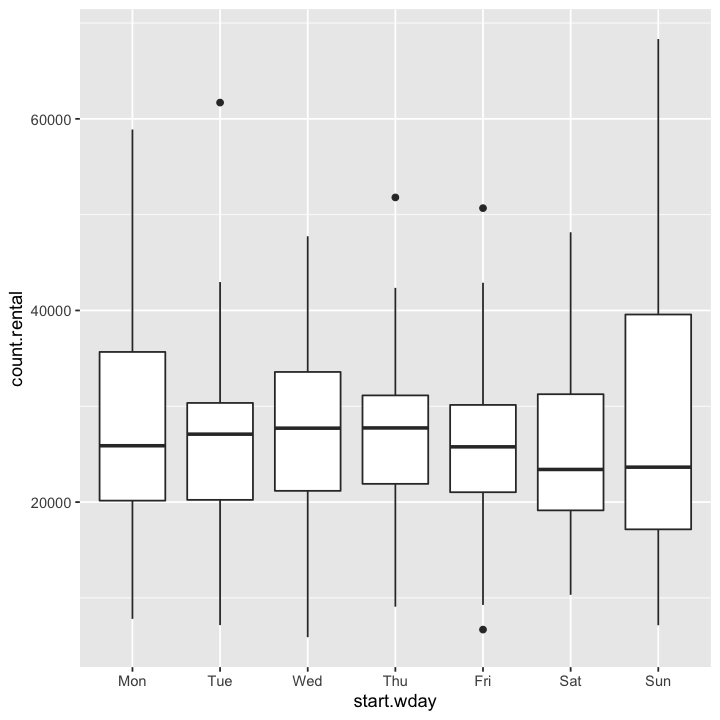

In [119]:
options(repr.plot.width=6, repr.plot.height=6)
ggplot(dfLondon) +
    aes(x=start.wday, y=count.rental) +
    geom_boxplot()

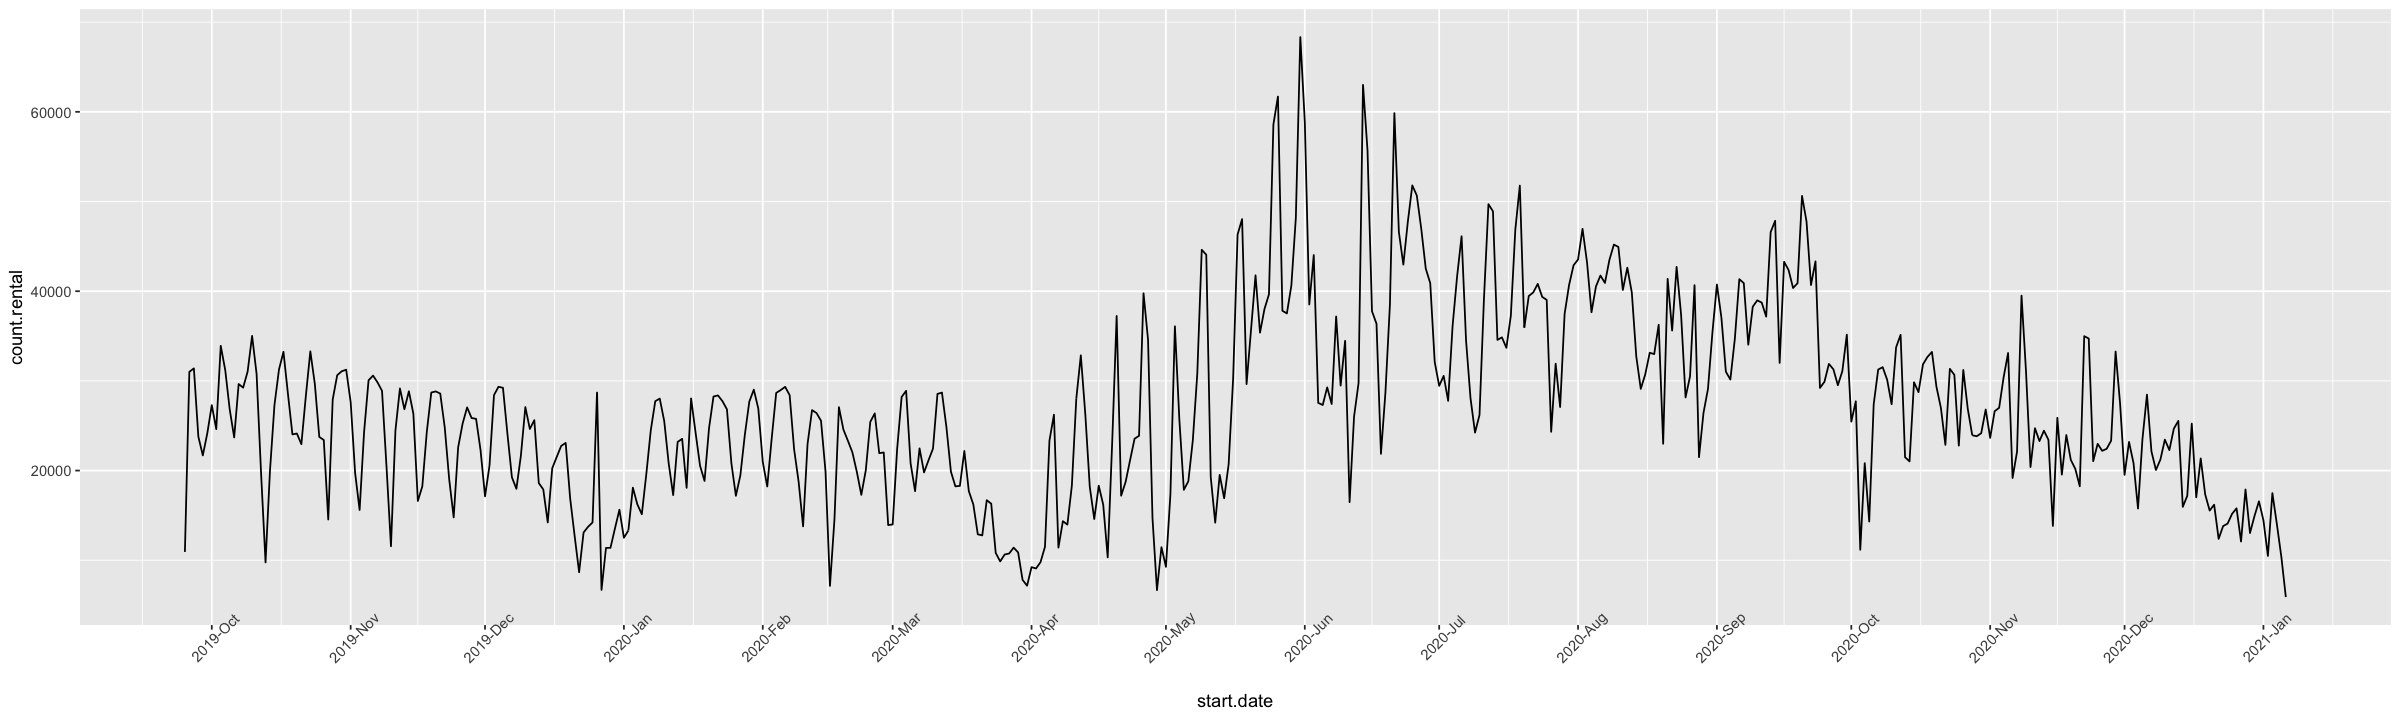

In [120]:
options(repr.plot.width=20, repr.plot.height=6)
ggplot(dfLondon) +
  aes(x=start.date, y=count.rental, group=1) +
  geom_line(stat='identity') +
  scale_x_date(date_labels = "%Y-%b", date_breaks="1 month") +
  theme(axis.text.x=element_text(angle=45))

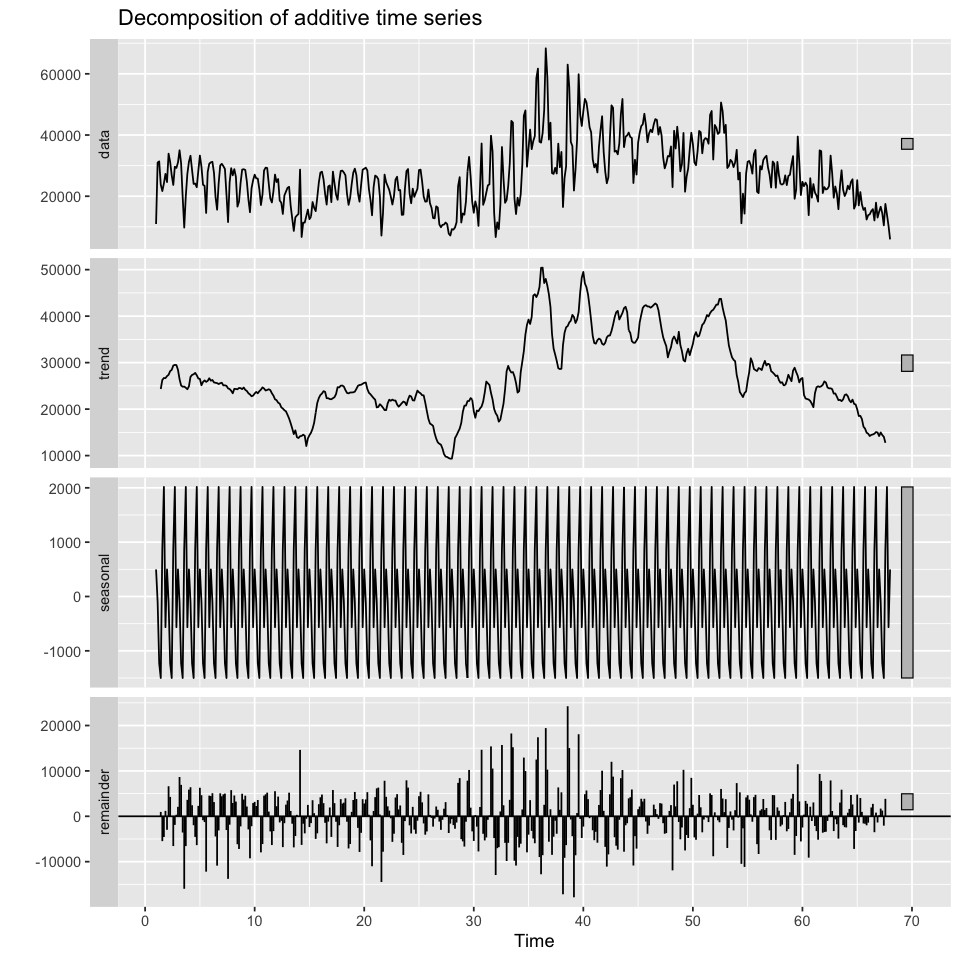

In [146]:
options(repr.plot.width=8, repr.plot.height=8)
dfLondon$count.rental %>%
    ts(frequency=7) %>%
    decompose(type='additive') %>%
    autoplot

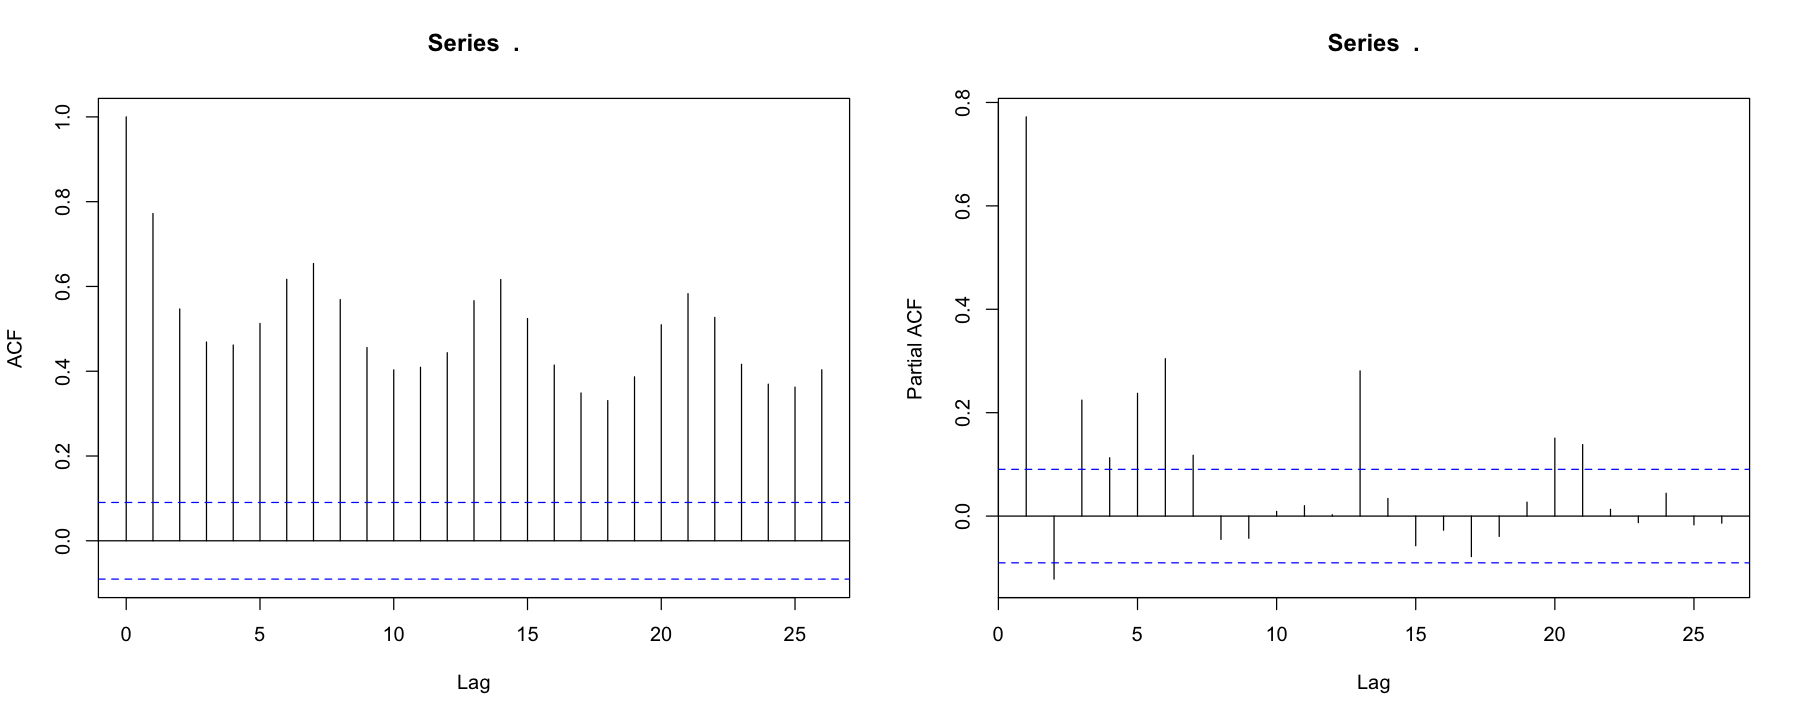

In [122]:
options(repr.plot.width=15, repr.plot.height=6)
par(mfrow=c(1,2))
dfLondon$sum.duration %>% acf
dfLondon$sum.duration %>% pacf

In [ ]:
(5,7,4,6,1,5,3)
(9,5,7,4,6,1,5)
correlation coefficient
statistical significant

In [123]:
dfLondon$count.rental %>% adf.test()


	Augmented Dickey-Fuller Test

data:  .
Dickey-Fuller = -2.211, Lag order = 7, p-value = 0.4888
alternative hypothesis: stationary


In [124]:
dfLondon$count.rental %>% adf.test(k=1)

Warning message in adf.test(., k = 1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  .
Dickey-Fuller = -7.3577, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


In [125]:
dfLondon$count.rental %>% adf.test(k=7)


	Augmented Dickey-Fuller Test

data:  .
Dickey-Fuller = -2.211, Lag order = 7, p-value = 0.4888
alternative hypothesis: stationary


In [17]:
dfLondon$count.rental %>% auto.arima(
    d=0, max.d=2,
    start.p=2, max.p=7,
    start.q=2, max.q=7,
    D=0, max.D=2,
    start.P=2, max.P=7,
    start.Q=2, max.Q=7,
)

Series: . 
ARIMA(6,0,3) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ar4     ar5      ar6      ma1     ma2
      2.7380  -3.3742  2.2822  -0.8239  0.2806  -0.1069  -2.1205  1.9811
s.e.  0.0953   0.2109  0.2427   0.2189  0.1596   0.0637   0.0852  0.1157
          ma3       mean
      -0.7887  25043.529
s.e.   0.0602   4145.342

sigma^2 = 35005021:  log likelihood = -4745.46
AIC=9512.91   AICc=9513.49   BIC=9558.59